# Einmahl (1990) Tail Probability Convergence Simulations

Einmahl (1990) gives convergence results for use of the empirical survival function as an estimator for the true survival function, specifically for use in the tails of the distribution. Of course, this estimator is useless beyond the realm of all observed data, and maybe even near the uppermost data points, but Einmahl establishes uniform consistency results for use of such estimators in *intermediate* tail estimation.

## Univariate Case (Simulation Verification of Einmahl)

In [2]:
library(mvtnorm)
library(mnormt)
library(ggplot2)

In [121]:
ns <- c(10, 100, 1000, 10000, 100000)
alpha <- 0.5
n_sims <- 500
sim_res <- vector(mode='list', length=length(ns))
lb <- -10

for (i in 1:length(ns)) {
    n <- ns[i]
    pn <- n^(-alpha)
    top <- qt(pn, df=4)
    pts <- seq(-10, top, length.out=100)

    vals <- rep(NA, n_sims)

    for (j in 1:n_sims) {

        dat <- rt(n, df=4)
        df <- ecdf(dat)
        vals[j] <- max(abs((df(pts)/pt(pts, df=4))-1))
    }
    sim_res[[i]] <- cbind(sups=vals, n=n)
}
    

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


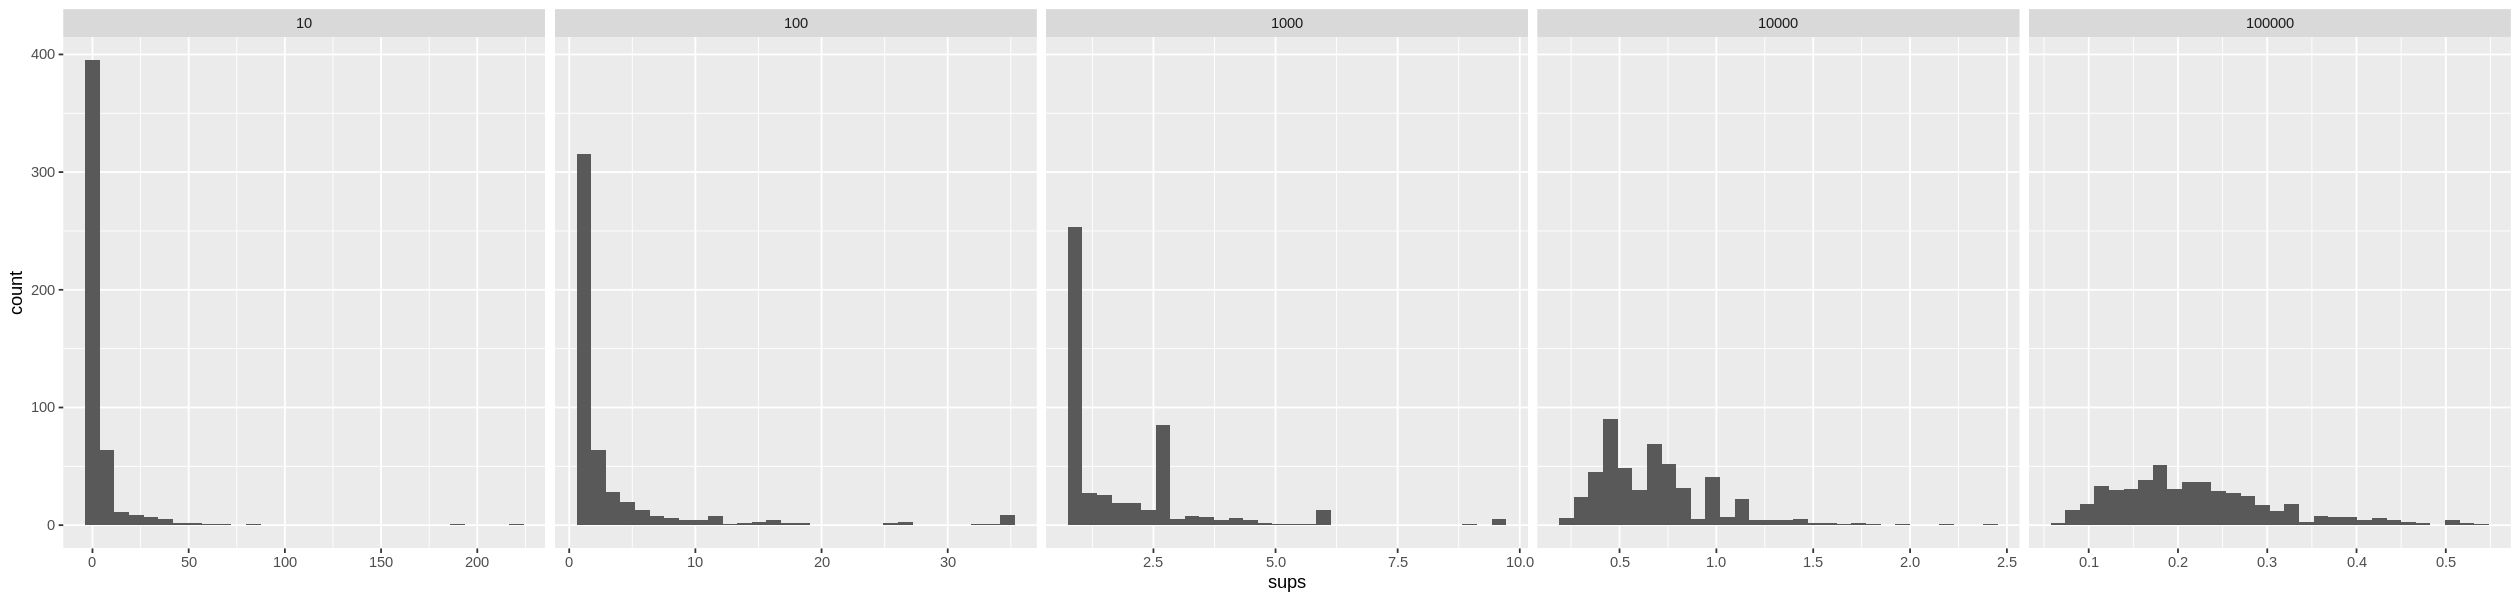

In [122]:
options(repr.plot.width=21, repr.plot.height=5, scipen=999)

res_df <- data.frame(do.call(rbind, sim_res))
ggplot(res_df) + geom_histogram(aes(x=sups)) + facet_grid(~as.factor(n), scales='free_x')

In [125]:
ns <- c(10, 100, 1000, 10000, 100000)
alpha <- 0.99
n_sims <- 500
sim_res <- vector(mode='list', length=length(ns))
lb <- -10

for (i in 1:length(ns)) {
    n <- ns[i]
    pn <- n^(-alpha)
    top <- qt(pn, df=4)
    pts <- seq(-10, top, length.out=100)

    vals <- rep(NA, n_sims)

    for (j in 1:n_sims) {

        dat <- rt(n, df=4)
        df <- ecdf(dat)
        vals[j] <- max(abs((df(pts)/pt(pts, df=4))-1))
    }
    sim_res[[i]] <- cbind(sups=vals, n=n)
}

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


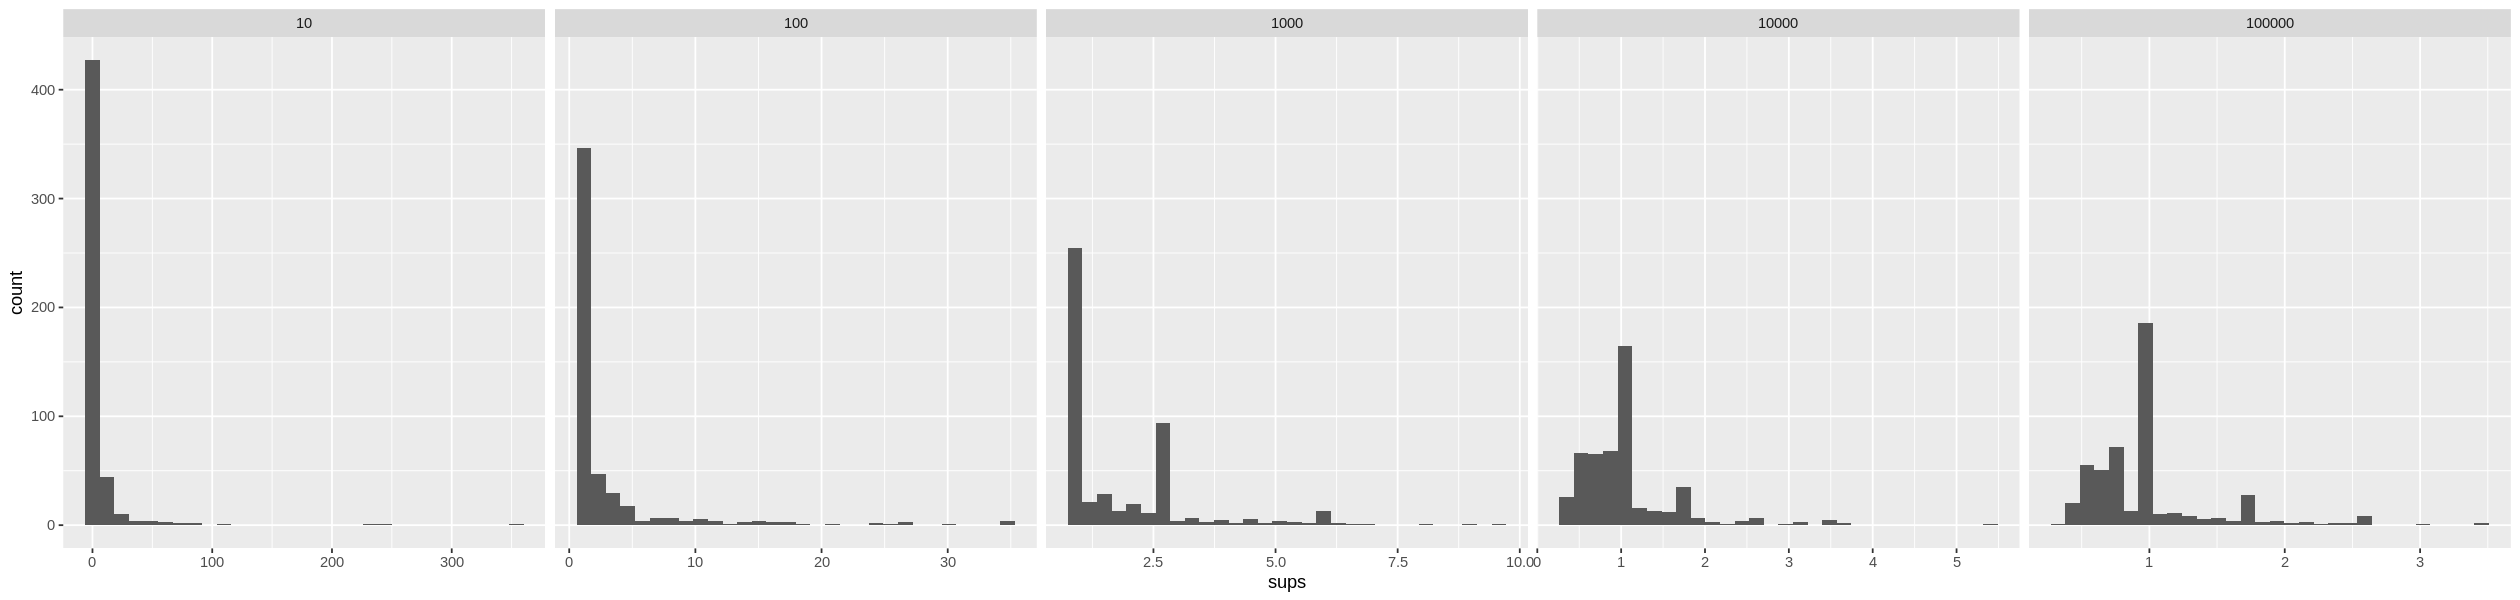

In [126]:
options(repr.plot.width=21, repr.plot.height=5, scipen=999)

res_df <- data.frame(do.call(rbind, sim_res))
ggplot(res_df) + geom_histogram(aes(x=sups)) + facet_grid(~as.factor(n), scales='free_x')

In [127]:
ns <- c(10, 100, 1000, 10000, 100000)
alpha <- 0.01
n_sims <- 500
sim_res <- vector(mode='list', length=length(ns))
lb <- -10

for (i in 1:length(ns)) {
    n <- ns[i]
    pn <- n^(-alpha)
    top <- qt(pn, df=4)
    pts <- seq(-10, top, length.out=100)

    vals <- rep(NA, n_sims)

    for (j in 1:n_sims) {

        dat <- rt(n, df=4)
        df <- ecdf(dat)
        vals[j] <- max(abs((df(pts)/pt(pts, df=4))-1))
    }
    sim_res[[i]] <- cbind(sups=vals, n=n)
}

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


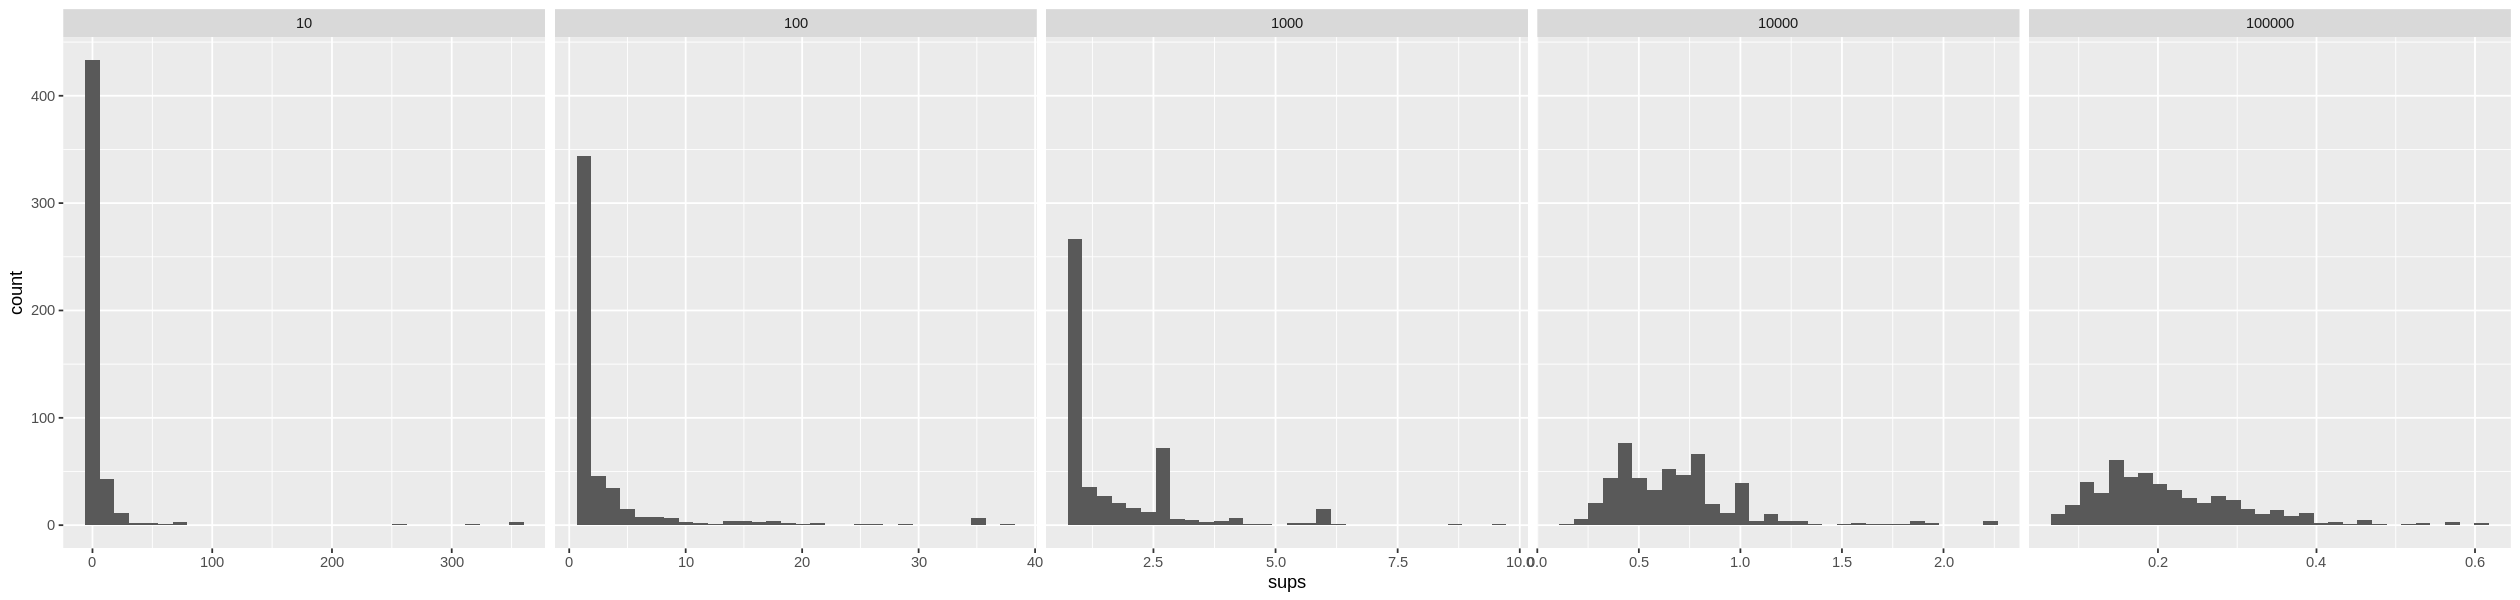

In [128]:
options(repr.plot.width=21, repr.plot.height=5, scipen=999)

res_df <- data.frame(do.call(rbind, sim_res))
ggplot(res_df) + geom_histogram(aes(x=sups)) + facet_grid(~as.factor(n), scales='free_x')

Behavior looks as expected, as we increase $\alpha$, we get less convergence at fixed sample sizes. Of course, as $n$ gets larger and larger, no matter how far we look out, we will get this kind of uniform convergence, but it's a question of how much error are we willing to tolerate for smaller sample sizes, which is a question of choice of $\alpha$. Smaller $\alpha$ means smaller error more quickly, bigger alpha means bigger error more quickly.

## Multivariate Case

We want some result like the following. Let $C_{n} = \{x \in \mathbb{R}^{2} : \bar{F}(x) \geq p_{n}\}$.

\begin{align}
    \sup_{x \in C_{n}} r_{n}|(\bar{F}_{n}(x)/\bar{F}(x))-1| \overset{p}{\to} 0
\end{align}